In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Dear\AppData\Local\Temp\ipykernel_14792\1943643728.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


DATA PREPARATION
- Null data handling
- Duplicate data handling
- Data encoding


In [2]:
# load data
data = pd.read_csv("earthquakes-1900-2023.tsv", sep='\t')  
data = data[["Tsu", "Focal Depth (km)", "Mag"]]
data["Tsu"] = data["Tsu"].apply(lambda x: "Tsunami" if pd.notnull(x) else "No Tsunami")
data.head()

,Tsu,Focal Depth (km),Mag
0,No Tsunami,NaN,NaN
1,Tsunami,NaN,NaN
2,No Tsunami,NaN,7.8
3,No Tsunami,NaN,NaN
4,Tsunami,10.0,7.3


In [3]:
# NULL DATA HANDLING

print(data.isnull().sum())
print ('-------------------------')
print(data.info())

# null data amount is not significant


Tsu                   0
Focal Depth (km)    692
Mag                 294
dtype: int64
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tsu               3904 non-null   object 
 1   Focal Depth (km)  3212 non-null   float64
 2   Mag               3610 non-null   float64
dtypes: float64(2), object(1)
memory usage: 91.6+ KB
None


In [4]:
# drop null data 
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3156 entries, 4 to 3903
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tsu               3156 non-null   object 
 1   Focal Depth (km)  3156 non-null   float64
 2   Mag               3156 non-null   float64
dtypes: float64(2), object(1)
memory usage: 98.6+ KB


In [6]:
# DUPLICATE DATA HANDLING

print(data.duplicated().sum())

# Drop duplicate rows
data = data.drop_duplicates()

1414


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1742 entries, 4 to 3901
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tsu               1742 non-null   object 
 1   Focal Depth (km)  1742 non-null   float64
 2   Mag               1742 non-null   float64
dtypes: float64(2), object(1)
memory usage: 54.4+ KB


In [15]:
# Encode "Tsu" column as 0 for "No Tsunami" and 1 for "Tsunami"
data['Tsu'] = data['Tsu'].map({'No Tsunami': 0, 'Tsunami': 1})

DATA PREPROCESSING
- input- output split 
- train-test split
- standardization data

In [9]:
# INPUT_OUTPUT SPLIT

output_data = data["Tsu"]
input_data = data.drop("Tsu", axis = 1)

In [16]:
def extractInputOutput(data,
                       output_column_name):
    """
    Function to separate input and output data
     :param data: <pandas dataframe> data for the entire sample
     :param output_column_name: <string> output column name
     :return input_data: <pandas dataframe> input data
     :return output_data: <pandas series> output data
    """
    output_data = data[output_column_name]
    input_data = data.drop(output_column_name,
                           axis = 1)
    
    return input_data, output_data

In [17]:
output_column_name = ["Tsu"]

X, y = extractInputOutput(data = data,
                          output_column_name = output_column_name)

In [18]:
X.head()

,Focal Depth (km),Mag
4,10.0,7.3
5,60.0,6.9
7,60.0,7.5
9,33.0,7.6
14,33.0,6.9


In [19]:
y.head()

,Tsu
4,1
5,1
7,0
9,0
14,1


In [20]:
# TRAIN-TEST SPLIT

from sklearn.model_selection import train_test_split

In [21]:
# Check data proportion
data["Tsu"].value_counts(normalize = True)

# data not balance

Tsu
0    0.673364
1    0.326636
Name: proportion, dtype: float64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y,# use stratify for imbalance data
                                                    random_state = 123)

In [24]:
# Check splitting result
print(X_train.shape)
print(X_test.shape)

(1393, 2)
(349, 2)


In [21]:
# Ratio
X_test.shape[0] / X.shape[0]

0.20034443168771526

In [25]:
# STANDARDIZATION

from sklearn.preprocessing import StandardScaler

# function
def standardizerData(data):
    """
    Function to standardize data
     :param data: <pandas dataframe> sample data
     :return standardized_data: <pandas dataframe> sample standard data
     :return standardizer: method for standardizing data
     """
    data_columns = data.columns  
    data_index = data.index  

    # fit standardizer
    standardizer = StandardScaler()
    standardizer.fit(data)

    # transform data
    standardized_data_raw = standardizer.transform(data)
    standardized_data = pd.DataFrame(standardized_data_raw)
    standardized_data.columns = data_columns
    standardized_data.index = data_index

    return standardized_data, standardizer

In [26]:
X_train_clean, standardizer = standardizerData(data = X_train)

In [27]:
X_train_clean.head()

,Focal Depth (km),Mag
1035,-0.470454,0.596804
1283,0.189497,0.961511
773,-0.299777,-0.132609
2673,-0.561482,0.232098
2081,0.519472,-0.223785


BENCHMARK

In [29]:
from sklearn.dummy import DummyClassifier

# Object
dummy_clf = DummyClassifier(strategy = "most_frequent")

# fit data
dummy_clf.fit(X = X_train,
              y = y_train)

DummyClassifier(strategy='most_frequent')

In [41]:
# Accuracy score from dummy
from sklearn.metrics import accuracy_score

# Calculate accuracy score on testing data
accuracy = dummy_clf.score(X_test, y_test)

print("Dummy Classifier Accuracy:", accuracy)


Dummy Classifier Accuracy: 0.673352435530086


K NEAREST NEIGHBOUR MODEL

In [33]:
# Find best n_neighbors value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


# Define a range of n_neighbors value
k_values = list(range(1, 17))  # from paper reference
# Create a parameter grid
param_grid = {'n_neighbors': k_values}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best value of n_neighbors
best_k = grid_search.best_params_['n_neighbors']
print("Best n_neighbors:", best_k)



c:\Users\Dear\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Dear\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Dear\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Dear\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: Data

Best K: 15


c:\Users\Dear\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Dear\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Dear\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Dear\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: Data

In [35]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

# Prediction
predicted_knn = pd.DataFrame(knn.predict(X_train))
predicted_knn.head()

c:\Users\Dear\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,0
0,1
1,0
2,0
3,0
4,0


In [36]:
# Performance in data training
knn.score(X_train, y_train)

0.7480258435032304

In [38]:
# Performance in data test
def testPrediction(X_test, y_test, classifier, compute_score):
    """
    Function to get predictions from the model
     :param X_test: <pandas dataframe> input
     :param y_test: <pandas series> output/target
     :param classifier: <sklearn method> classification model
     :param compute_score: <bool> True: displays the score, False: does not
     :return test_predict: <list> prediction results of input data
     :return score: <float> model accuracy
    """
    if compute_score:
        score = classifier.score(X_test, y_test)
        print(f"Accuracy : {score:.4f}")

    test_predict = classifier.predict(X_test)

    return test_predict, score

In [40]:

knn_test_predict, score = testPrediction(X_test = X_test,
                                         y_test = y_test,
                                         classifier = knn,
                                         compute_score = True)

Accuracy : 0.7536


In [77]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for KNN model
y_pred_knn = knn.predict(X_test)
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_knn)

array([[207,  28],
       [ 58,  56]], dtype=int64)

KNN Model Evaluation
- The accuracy score of the KNN model on the training data is 0.7480
- The accuracy score of the KNN model on the testing data is 0.7536.
- The accuracy score of the DummyClassifier (benchmark) on the training data is 0.6733.

- The KNN model outperforms the DummyClassifier (benchmark) on both the training and testing data. This indicates that the KNN model has learned meaningful patterns from the data and is capable of making better predictions than simply predicting the most frequent class.
- The accuracy score of the KNN model on the testing data is close to the score on the training data suggests that the model is not overfitting to the training data and is capturing underlying patterns that are applicable to new instances.

LOGISTIC MODEL


In [43]:
# HYPERPARAMETER TUNING

from sklearn.linear_model import LogisticRegression

# Define a logistic regression model
logreg = LogisticRegression()

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength values
    'penalty': ['l1', 'l2'], # Penalty types: L1 (Lasso) and L2 (Ridge)
    'class_weight': [None, 'balanced']   # Class weight options 
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


c:\Users\Dear\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dear\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dear\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dear\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Best Hyperparameters: {'C': 10, 'class_weight': None, 'penalty': 'l2'}


In [46]:
# LOGISTIC MODEL

# Create a logistic regression model with the best hyperparameters
best_logreg = LogisticRegression(C=10, penalty='l2', class_weight=None)

# Train the model on the training data
best_logreg.fit(X_train, y_train)
y_pred = best_logreg.predict(X_train)

# Performance in training data
best_logreg.score(X_train, y_train)

c:\Users\Dear\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7185929648241206

In [47]:
# Performance in data test
logreg_test_predict, score = testPrediction(X_test = X_test,
                                         y_test = y_test,
                                         classifier = best_logreg,
                                         compute_score = True)

Accuracy : 0.7507


In [78]:
# Generate confusion matrix for logistic model
y_pred_logreg = best_logreg.predict(X_test)
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_logreg)

array([[204,  31],
       [ 56,  58]], dtype=int64)

Logistic Model Evaluation
- The accuracy score of the Logistic model on the training data is 0.7186
- The accuracy score of the Logistic model on the testing data is 0.7507
- The accuracy score of the DummyClassifier (benchmark) on the training data is 0.6733.



RANDOM FOREST

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
# HYPERPARAMETER TUNING

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],   # Range of values for the number of estimators
    'max_features': ["sqrt", "log2"]
    }

# Create a RandomForestClassifier instance
rf_classifier = RandomForestClassifier(random_state=123)

# Perform grid search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

c:\Users\Dear\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Dear\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Dear\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Dear\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionW

Best Parameters: {'max_features': 'sqrt', 'n_estimators': 50}


c:\Users\Dear\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [64]:
# RANDOM FOREST MODEL

# Create a Random Forest model with the best hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=50,
                                       max_features='sqrt', 
                                       random_state=123)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_train)

# Performance in training data
rf_classifier.score(X_train, y_train)

c:\Users\Dear\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8901651112706389

In [65]:
# Performance in data test
logreg_test_predict, score = testPrediction(X_test = X_test,
                                         y_test = y_test,
                                         classifier = rf_classifier,
                                         compute_score = True)

Accuracy : 0.6275


In [79]:
# Generate confusion matrix for random forest model
y_pred_rf = rf_classifier.predict(X_test)
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_rf)

array([[172,  63],
       [ 67,  47]], dtype=int64)

Random Forest Evaluation
- The accuracy score of the Random Forest on the training data is 0.8901
- The accuracy score of the Random Forest on the testing data is 0.6275
- The accuracy score of the DummyClassifier (benchmark) on the training data is 0.6733.

The accuracy score on the testing data is 0.6275, which is significantly lower than the training accuracy. This difference between the training and testing accuracies suggests that the Random Forest model may be overfitting to the training data.

ALL MODEL EVALUATION

In [66]:
from sklearn.metrics import classification_report

# Generate classification report for KNN model
knn_report = classification_report(y_test, knn.predict(X_test))
print("Classification Report for KNN Model:")
print(knn_report)

# Generate classification report for logistic regression model
logreg_report = classification_report(y_test, best_logreg.predict(X_test))
print("\nClassification Report for Logistic Regression Model:")
print(logreg_report)

# Generate classification report for random forest model
rf_report = classification_report(y_test, rf_classifier.predict(X_test))
print("\nClassification Report for Random Forest Model:")
print(rf_report)

Classification Report for KNN Model:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       235
           1       0.67      0.49      0.57       114

    accuracy                           0.75       349
   macro avg       0.72      0.69      0.70       349
weighted avg       0.74      0.75      0.74       349


Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       235
           1       0.65      0.51      0.57       114

    accuracy                           0.75       349
   macro avg       0.72      0.69      0.70       349
weighted avg       0.74      0.75      0.74       349


Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73       235
           1       0.43      0.41      0.42       114

    accuracy                           0.63

In [73]:
from sklearn.metrics import confusion_matrix


# Generate confusion matrix for KNN model
y_pred_knn = knn.predict(X_test)
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_knn)


# [[tp, fp]]
# [[fn, tn]]

array([[207,  28],
       [ 58,  56]], dtype=int64)

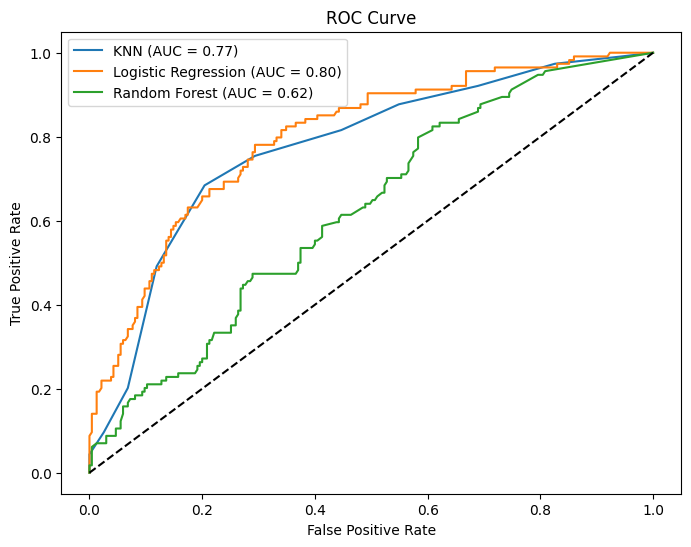

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have trained models named knn_model, logreg_model, and rf_model

# Calculate the probabilities of the positive class (class 1)
# Replace model.predict_proba(X_test) with the appropriate method for obtaining class probabilities from each model
# For example, model.predict_proba(X_test)[:, 1] if the positive class is the second class
knn_probs = knn.predict_proba(X_test)[:, 1]
logreg_probs = best_logreg.predict_proba(X_test)[:, 1]
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve for each model
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Calculate the area under the ROC curve (AUC) for each model
knn_auc = roc_auc_score(y_test, knn_probs)
logreg_auc = roc_auc_score(y_test, logreg_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Plot ROC curve for each model
plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


- Logistic Regression achieves the highest AUC (0.80), suggesting good separation between positive and negative classes The model’s TPR is high even at low FPR values.
- KNN has AUC of 0.77, performs well but not as effectively as Logistic Regression. Its TPR increases gradually as FPR rises.
- Random Forest has the lowest AUC (0.62) indicates weaker performance. The TPR-FPR trade-off is less favorable compared to the other models.